In [2]:
# Multiple Linear Regression

using DataFrames
using CSV
using Random
using MLDataUtils
using CategoricalArrays

Random.seed!(0)

# Importing the dataset
df = CSV.File("50_Startups.csv") |> DataFrames.DataFrame!;

rename!(df, [ :RD, :Administration, :Marketing, :State, :Profit ]);

categorical!(df, :State)

(df_train, df_test) = splitobs(shuffleobs(df), at = 0.8);

In [12]:
n = size(df)[1]

50

In [9]:
adjusted_r2(model, n, p) = 1.0 - (1.0 - r2(model)) * (n - 1) / (n - p - 1)

adjusted_r2 (generic function with 1 method)

In [3]:
using GLM

regressor = lm(@formula(Profit ~ RD + Administration + Marketing + State), df_train)

┌ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1260


StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Profit ~ 1 + RD + Administration + Marketing + State

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────────────
                      Estimate    Std. Error     t value  Pr(>|t|)       Lower 95%      Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)      52214.8        5801.94        8.99954      <1e-9   40423.8         64005.7
RD                   0.757893      0.0460001  16.4759       <1e-17      0.664409        0.851376
Administration      -0.0131985     0.0460018  -0.286912     0.7759     -0.106685        0.0802885
Marketing            0.0320686     0.015782    2.03197      0.0500     -4.26611e-6      0.0641415
State: Florida   -1490.17       3190.13       -0.467118     0.6434  -7973.29       

In [15]:
y_pred = predict(regressor, df_test);

In [16]:
y_test = df_test[!, :Profit];

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1260


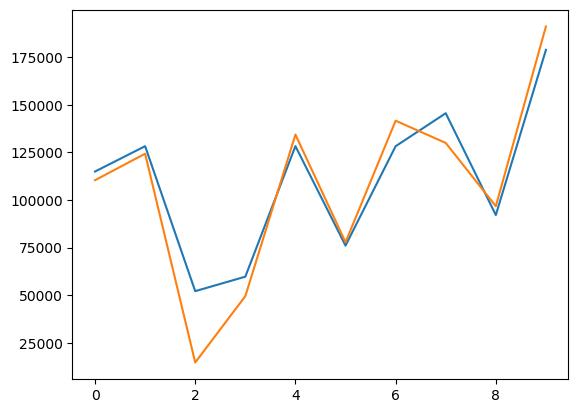

In [17]:
using PyPlot

plot(y_pred)
plot(y_test)
show()

In [19]:
regressor_OLS = lm(@formula(Profit ~ RD + Administration + Marketing + State), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Profit ~ 1 + RD + Administration + Marketing + State

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────────────
                      Estimate    Std. Error     t value  Pr(>|t|)       Lower 95%      Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)      50125.3        6884.82        7.28056      <1e-8   36249.9         64000.8
RD                   0.806023      0.046407   17.3686       <1e-20      0.712496        0.89955
Administration      -0.0270043     0.0522315  -0.517012     0.6077     -0.13227         0.0782615
Marketing            0.0269799     0.0171422   1.57389      0.1227     -0.00756789      0.0615276
State: Florida     198.789      3371.01        0.0589701    0.9532  -6595.03        

In [20]:
r2(regressor_OLS), adjusted_r2(regressor_OLS, n, 4)

(0.9507524843355148, 0.9463749273875606)

In [21]:
regressor_OLS = lm(@formula(Profit ~ RD + Administration + Marketing), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Profit ~ 1 + RD + Administration + Marketing

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────────
                     Estimate    Std. Error    t value  Pr(>|t|)       Lower 95%      Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)     50122.2        6572.35        7.62622     <1e-8   36892.7         63351.7
RD                  0.805715      0.0451473  17.8464      <1e-21      0.714838        0.896592
Administration     -0.026816      0.0510288  -0.525507    0.6018     -0.129532        0.0758996
Marketing           0.0272281     0.0164512   1.65508     0.1047     -0.00588655      0.0603427
───────────────────────────────────────────────────────────────────────────────────────────────

In [23]:
r2(regressor_OLS), adjusted_r2(regressor_OLS, n, 3)

(0.9507459940683246, 0.9475337762901719)

In [24]:
regressor_OLS = lm(@formula(Profit ~ RD + Marketing), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Profit ~ 1 + RD + Marketing

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────
                  Estimate    Std. Error   t value  Pr(>|t|)       Lower 95%      Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────
(Intercept)  46975.9        2689.93       17.4636     <1e-21  41564.4         52387.3
RD               0.796584      0.0413476  19.2656     <1e-23      0.713403        0.879765
Marketing        0.0299079     0.01552     1.92705    0.0600     -0.00131436      0.0611301
───────────────────────────────────────────────────────────────────────────────────────────

In [25]:
r2(regressor_OLS), adjusted_r2(regressor_OLS, n, 2)

(0.9504503015559763, 0.9483418037498477)

In [26]:
regressor_OLS = lm(@formula(Profit ~ RD), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Profit ~ 1 + RD

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────
                 Estimate    Std. Error  t value  Pr(>|t|)     Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────────
(Intercept)  49032.9       2537.9        19.3203    <1e-23  43930.1       54135.7
RD               0.854291     0.0293056  29.1511    <1e-31      0.795369      0.913214
──────────────────────────────────────────────────────────────────────────────────────

In [27]:
r2(regressor_OLS), adjusted_r2(regressor_OLS, n, 1)

(0.9465353160804392, 0.9454214684987816)